In [91]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import geopandas as gpd
import folium

import matplotlib as mpl
mpl.rc('font', family='Noto Sans CJK TC')

### 讀入台北市公車站牌位置

這份站牌資料僅有點資料，若要做出Heatmap需要先使用groupby計算出每區的站牌個數，才能做後續的處理

In [92]:
bus =gpd.read_file('台北市公車站/busstop97.shp',encoding='utf-8')
bus.crs = {'init' :'epsg:3826'}
bus.head()

,STOPID,STOPNAME,geometry
0,1,十八份,POINT (302743.7530993833 2782544.186781683)
1,10,八勢里,POINT (296327.3297876574 2782607.199991122)
2,1000,內湖國中,POINT (309300.224030725 2774430.771356621)
3,1000019,健康新城,POINT (306720.3433056111 2771900.620051767)
4,1000020,長壽公園,POINT (306478.4038390757 2771883.199880296)


### Buffer功能測試

Buffer範圍:500m

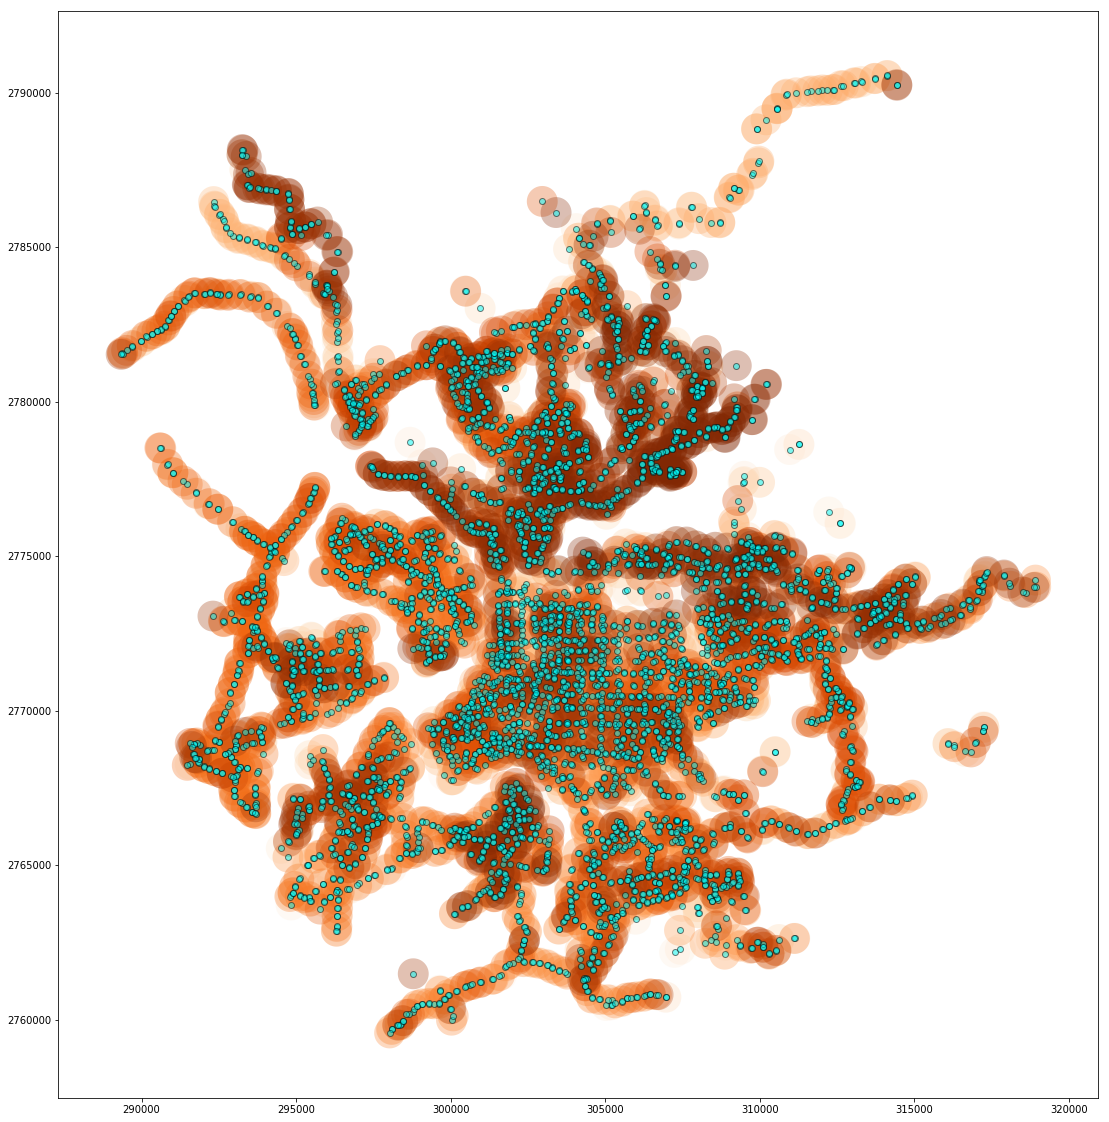

In [93]:
base=bus.buffer(500).plot(figsize =(20,20),alpha = 0.3,cmap='Oranges')
bus.plot(ax=base,color='cyan', alpha=0.5, edgecolor='k',figsize =(20,20))

### 用geoplot讀取與繪製 點資料

### 繪製Heatmap

geoplot.crs用來轉換投影

AlbersEqualArea() 亞伯特等積投影

In [96]:
import geoplot as gplt
import geoplot.crs as gcrs
tpntp1.crs= {'init' :'epsg:3826'}
bus.crs= {'init' :'epsg:3826'}
ax =gplt.polyplot(tpntp1,projection=gcrs.AlbersEqualArea(), figsize=(16, 8))
ax1=gplt.kdeplot(,ax=ax,shade=True,projection=gcrs.AlbersEqualArea(),shade_lowest=False)
#找到適合的資料

SyntaxError: invalid syntax (<ipython-input-96-1cfb9980b19d>, line 6)

In [97]:
fmap = folium.Map(location=[25.0173405,121.5375631], zoom_start=15)
fmap

## 製作台北與新北圖層

#### 一開始想用台北與新北的shp使用union功能把兩塊拼起來，但拼起來後如下圖會有奇怪的空隙
#### 因此改而使用geopandas的功能，從全台的shp中選出新北與台北來進行顯示

In [98]:
tp = gpd.read_file('G97_A_CADIST_P.shp',encoding = 'big5')
tp.crs = {'init' :'epsg:3826'}
tp.head()

,AREA,PERF_ID,COUN_ID,CPID,CPTID,NPID,NPTID,PNAME,TNAME,PTNAME,TM2_MAX_X,TM2_MAX_Y,TM2_MIN_X,TM2_MIN_Y,MAX_X,MAX_Y,MIN_X,MIN_Y,geometry
0,5.738380e+07,63012.0,6301200,63012,6301200,63012.0,6301200.0,臺北市,北投區,臺北市北投區,307802.1700,2.789176e+06,296266.0530,2.776476e+06,121.57361,25.21014,121.45871,25.09588,"POLYGON ((302675.6676993757 2785251.545594117,..."
1,6.110781e+07,63011.0,6301100,63011,6301100,63011.0,6301100.0,臺北市,士林區,臺北市士林區,311328.6318,2.787546e+06,296551.1512,2.774091e+06,121.60853,25.19528,121.46145,25.07434,"POLYGON ((307802.1699872206 2787372.759674619,..."
2,3.195183e+07,63010.0,6301000,63010,6301000,63010.0,6301000.0,臺北市,內湖區,臺北市內湖區,313380.3449,2.778643e+06,305676.8954,2.771635e+06,121.62848,25.11483,121.55181,25.05186,"POLYGON ((310064.6396263964 2778552.346185653,..."
3,1.382460e+07,63004.0,6300400,63004,6300400,63004.0,6300400.0,臺北市,中山區,臺北市中山區,307730.5324,2.776082e+06,302363.0968,2.770843e+06,121.57235,25.09193,121.51894,25.04483,"POLYGON ((305676.8954070802 2776082.190999218,..."
4,4.790129e+06,63006.0,6300600,63006,6300600,63006.0,6300600.0,臺北市,大同區,臺北市大同區,302761.2987,2.774825e+06,300900.7738,2.771202e+06,121.52304,25.08076,121.50446,25.04812,"POLYGON ((300900.7737859354 2774524.919405477,..."


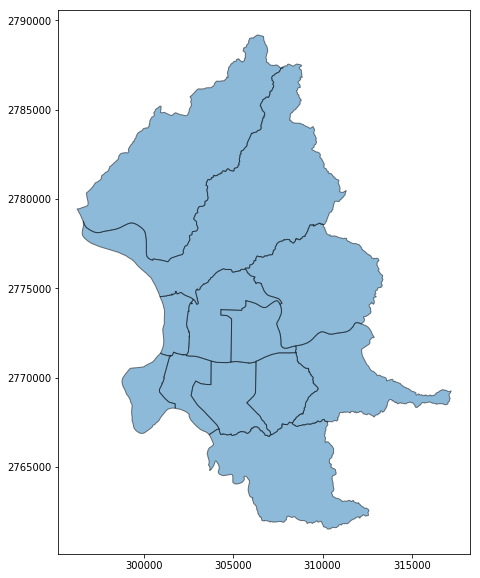

In [99]:
tp.plot(figsize= (10,10),alpha=0.5,edgecolor = "K")

In [100]:
ntp = gpd.read_file('新北市行政區域圖\行政區域圖.shp',encoding = 'utf-8')
ntp.crs= {'init' :'epsg:3826'}
ntp

,AREA,ADMIT,ADMIT_ID,TM2X,TM2Y,MAX_X,MAX_Y,MIN_X,MIN_Y,PID,PTID,PNAME,PTNAME,geometry
0,4.210383e+07,八里區,23,291700.07830,2.779907e+06,296481.96902,2.785137e+06,286918.18758,2.774677e+06,65000,6500023,新北市,八里區,"POLYGON ((292304.2811954265 2785137.001486272,..."
1,6.636898e+07,三芝區,21,301033.90622,2.791376e+06,307033.68747,2.797030e+06,295034.12497,2.785722e+06,65000,6500021,新北市,三芝區,"POLYGON ((297855.031144671 2794279.000572072, ..."
2,1.806343e+07,三重區,02,299040.81246,2.773243e+06,301152.90635,2.776363e+06,296928.71857,2.770122e+06,65000,6500002,新北市,三重區,"POLYGON ((300439.0310606685 2770853.497914623,..."
3,1.896720e+08,三峽區,09,291158.87509,2.751566e+06,300241.96876,2.760536e+06,282075.78142,2.742596e+06,65000,6500009,新北市,三峽區,"POLYGON ((298539.2499604515 2753757.749624197,..."
4,2.991187e+07,土城區,13,294902.37510,2.762080e+06,298647.96885,2.765450e+06,291156.78134,2.758710e+06,65000,6500013,新北市,土城區,"POLYGON ((294281.843717862 2764351.248564848, ..."
5,1.916816e+07,中和區,03,300188.03106,2.764722e+06,303517.78098,2.767644e+06,296858.28114,2.761799e+06,65000,6500003,新北市,中和區,"POLYGON ((302025.780973917 2764376.998562273, ..."
6,3.119942e+07,五股區,15,293922.50008,2.776540e+06,297506.40649,2.780492e+06,290338.59366,2.772587e+06,65000,6500015,新北市,五股區,"POLYGON ((297379.1543240541 2773434.604181357,..."
7,7.115855e+07,平溪區,24,326589.46866,2.768836e+06,332427.12507,2.774583e+06,320751.81225,2.763089e+06,65000,6500024,新北市,平溪區,"POLYGON ((329668.5938310765 2774445.997555373,..."
8,6.162251e+06,永和區,04,301814.35944,2.766712e+06,303766.34373,2.768292e+06,299862.37514,2.765133e+06,65000,6500004,新北市,永和區,"POLYGON ((301481.6982802237 2766044.293804116,..."
9,5.192398e+07,石門區,22,306804.73419,2.794395e+06,312478.78102,2.799082e+06,301130.68737,2.789709e+06,65000,6500022,新北市,石門區,"POLYGON ((303084.624915072 2797523.250247647, ..."


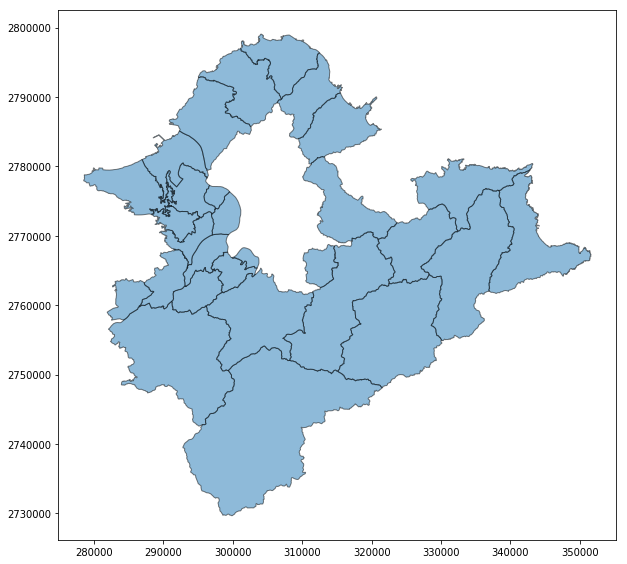

In [101]:
ntp.plot(figsize= (10,10),alpha=0.5,edgecolor = "K")

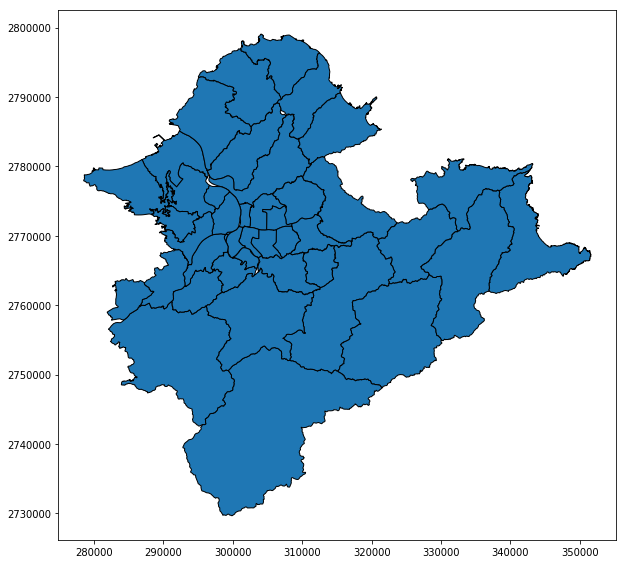

In [102]:
union = gpd.overlay(tp,ntp,how='union')
union.plot(figsize= (10,10),edgecolor = "k")
#試試看從台灣全島選出台北新北

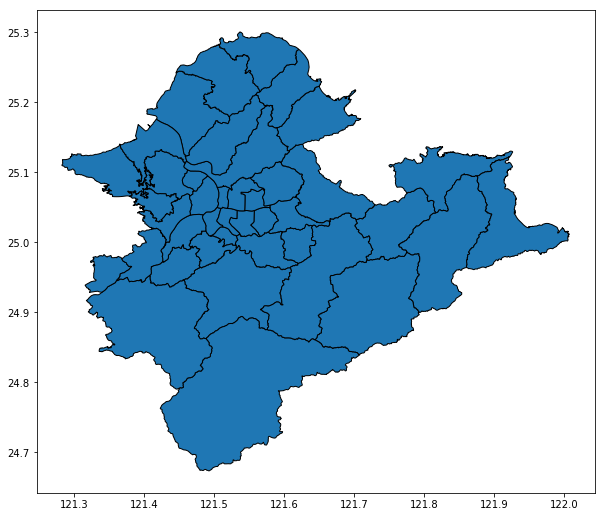

In [103]:
TW = gpd.read_file('台灣TWD97鄉鎮市\TOWN_MOI_1071226.shp',encoding = 'utf-8')
tpntp1 = TW[(TW['COUNTYNAME']=='新北市') | (TW['COUNTYNAME']=='臺北市') ]
tpntp1.plot(figsize= (10,10),edgecolor = "k")

In [104]:
#先在Excel篩選資料
df = pd.read_excel('村里學歷人數改.xlsx',encoding = 'utf-8')
colnames = df.loc[0].values
df = df[2:]
df.columns = colnames
df.index = range(1,7760)
df.head()

,統計年,區域別代碼,區域別,縣市名稱,鄉鎮市區,村里名稱,博士畢,碩士畢,大學畢,二專畢,後二專畢,高中畢,高職畢,國中畢,國小畢,不識字
1,107,65000010002,新北市板橋區,新北市,板橋區,流芳里,10,87,349,82,89,109,182,71,90,4
2,107,65000010003,新北市板橋區,新北市,板橋區,赤松里,6,63,197,28,51,51,88,41,51,7
3,107,65000010004,新北市板橋區,新北市,板橋區,黃石里,4,47,214,62,41,102,149,75,80,5
4,107,65000010005,新北市板橋區,新北市,板橋區,挹秀里,20,140,446,115,122,122,228,88,72,3
5,107,65000010006,新北市板橋區,新北市,板橋區,湳興里,9,262,1019,273,262,310,845,510,490,25


In [105]:
df2 = df.groupby(by='鄉鎮市區').sum()

![名稱問題](奇怪.jpg)

#### 檔案中的鄉鎮市區分類有三民一、二與鳳山一、二，將名稱統一為區

In [106]:
df2.drop(['統計年','區域別代碼','區域別','縣市名稱','村里名稱'],axis = 1,inplace = True)
df2

,博士畢,碩士畢,大學畢,二專畢,後二專畢,高中畢,高職畢,國中畢,國小畢,不識字
鄉鎮市區,,,,,,,,,,
七堵區,84,1585,8356,3241,1622,2833,8867,5499,5237,447
七美鄉,6,100,448,129,43,90,574,619,422,126
七股區,14,333,2529,571,454,922,3688,3860,3345,668
三峽區,361,4123,18137,5277,3853,5932,17599,14132,7947,819
三星鄉,43,512,2693,871,637,777,3578,3603,2358,330
三民區,1728,18020,68597,15667,19115,14703,56770,22473,25540,1989
三灣鄉,12,104,876,285,135,397,1182,875,957,22
三義鄉,20,393,2290,701,485,861,3075,1877,1872,110
三芝區,46,504,3130,931,704,1272,3737,3591,2128,526
